# Namespaces and Scopes

In Python, a namespace is a container that holds identifiers (variables, functions, classes, etc.) and provides a way to distinguish them based on their names. Namespaces help avoid naming conflicts and provide a way to organize and access different elements within a program.

Python has several types of namespaces, including the built-in namespace, global namespace, and local namespace. The scope determines the visibility and accessibility of identifiers within a namespace.

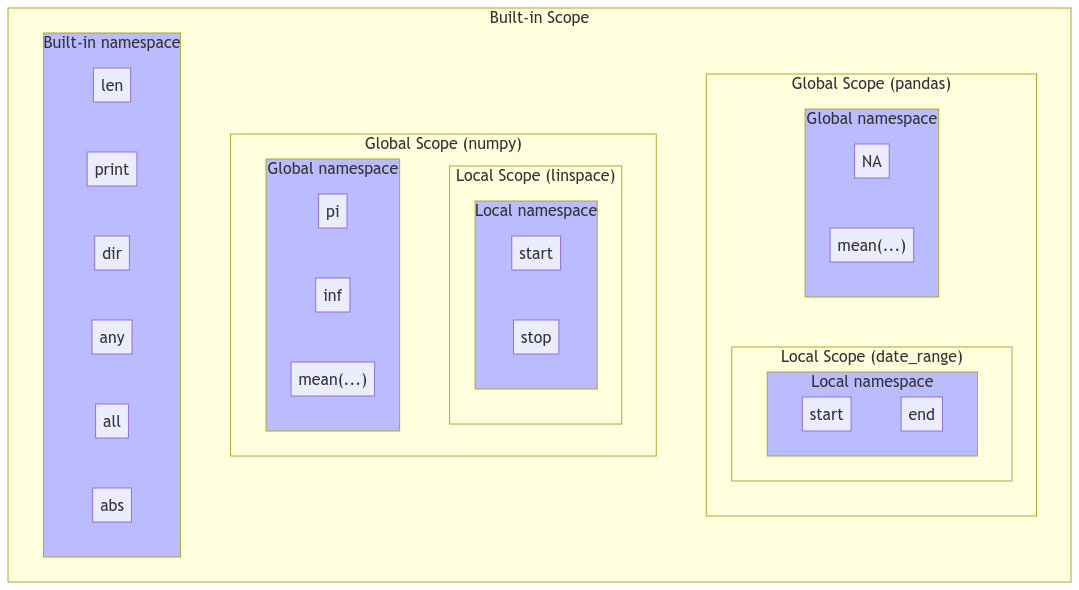

In [1]:
from IPython.display import Image
Image(filename="static/namespace_scope1.png")

First, let's define a variable `global_var` in the global scope, which will be accessible from all scopes:

In [ ]:
global_var = "I'm a global variable"

Now, let's create a function `my_function` that defines a local variable `local_var` within its scope:

In [ ]:
def my_function():
    local_var = "I'm a local variable"
    print(local_var)

If we call the function and print the `local_var`, it will print the value of the local variable:

In [ ]:
my_function()

However, if we try to access the `local_var` variable outside the function, we'll encounter an error because it is not defined in the global scope:

In [ ]:
local_var

We can also have local variable name same as the global variable name. But In case they are modified inside the local scope, they will remain unchanged in global scope

In [ ]:
def my_function2():
    global_var = "Modified global variable"
    print(global_var)

In [ ]:
my_function2()

In [ ]:
global_var

We can't reference a global variable and assign it to a local_variable with same name

In [ ]:
def my_function3():
    print(global_var)
    global_var = "Modified global variable"

In [ ]:
my_function3()

Now, let's see how the `global` keyword can be used to access and modify a global variable within a function. We'll modify the `my_function` to access and modify the `global_var`:

In [ ]:
def my_function4():
    global global_var  # Declare the variable as global
    global_var = "Modified global variable"
    print(global_var)

If we call the function and print the `global_var`, we'll see that the global variable has been modified:

In [ ]:
my_function4()

We can also access the modified global variable outside the function:

In [ ]:
print(global_var)

In this example, we demonstrate the concept of namespaces and scope in Python. Each function has its own local namespace, where variables defined within the function are accessible. The global namespace contains variables accessible throughout the entire module or script. The `global` keyword is used to access and modify variables from the global namespace within a function.

## Non-local Scope

Global variables can be modified using `global` keyword. But what about `local` variable of a function.

In [ ]:
def outer_func():
    a = 10
    def inner_func():
        global a
        a = 100
    inner_func()
    print(a)
outer_func()  # We can try using global, but that will not work

For modifying local variable of a outer function inside an inner function, we use `nonlocal` keyword.

In [ ]:
def outer_func():
    a = 10
    def inner_func():
        nonlocal a
        a = 100
    inner_func()
    print(a)
outer_func() 

We can also use `locals()` and `globals()` built-in functions to check for global and local variable in current scope.

# Closures

Function + extended scope (that contains free variables)

In [ ]:
def outer_func():
    # Free variable
    name = "Debakar"
    
    def inner_func():
        print(name)
    inner_func()
    
outer_func()

In [ ]:
def outer_func():
    # Free variable
    name = "Debakar"
    
    def inner_func():
        print(name)

    return inner_func

In [ ]:
func = outer_func()  # inner() + extended scope `name`
func()

In [ ]:
func.__code__.co_freevars

In [ ]:
func.__closure__

In [ ]:
def outer_func():
    # Free variable
    name = "Debakar"
    print(hex(id(name)))
    
    def inner_func():
        print(hex(id(name)))
        print(name)

    return inner_func

In [ ]:
func = outer_func()  # inner() + extended scope `name`
func()

In [ ]:
func.__closure__

In [ ]:
def outer_func(greeting):
    # Free variable
    name = "Debakar"
    print(hex(id(name)))
    print(hex(id(greeting)))
    
    def inner_func():
        print(hex(id(name)))
        print(hex(id(greeting)))
        print(f"{greeting} {name}")

    return inner_func

In [ ]:
func = outer_func("Hello")

In [ ]:
func.__code__.co_freevars

In [ ]:
func.__closure__